In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random


In [2]:
mninst_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download=True)


In [3]:
mninst_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download=True)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


In [18]:
training_epochs = 15
batch_size = 100

In [19]:
#Datalodaer
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset= mninst_train,
                         batch_size= batch_size,
                         shuffle= True,
                         drop_last= True)

In [20]:
# model
linear = torch.nn.Linear(28*28,10, bias= True).to(device)

In [21]:
#  loss & optim
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [22]:
X_list = []
acc_list = []


Epoch: 1 Cost = 0.5355 Acc = 86.7733%
Test Accuracy: 0.8952999711036682
Epoch: 2 Cost = 0.3593 Acc = 90.0733%
Test Accuracy: 0.9045000076293945
Epoch: 3 Cost = 0.3312 Acc = 90.7800%
Test Accuracy: 0.896399974822998
Epoch: 4 Cost = 0.3166 Acc = 91.1883%
Test Accuracy: 0.9049999713897705
Epoch: 5 Cost = 0.3072 Acc = 91.4333%
Test Accuracy: 0.9049999713897705
Epoch: 6 Cost = 0.3002 Acc = 91.6217%
Test Accuracy: 0.9014999866485596
Epoch: 7 Cost = 0.2951 Acc = 91.8133%
Test Accuracy: 0.9034000039100647
Epoch: 8 Cost = 0.2909 Acc = 91.8933%
Test Accuracy: 0.8981999754905701
Epoch: 9 Cost = 0.2874 Acc = 91.9750%
Test Accuracy: 0.8981000185012817
Epoch: 10 Cost = 0.2844 Acc = 92.0267%
Test Accuracy: 0.8930000066757202
Epoch: 11 Cost = 0.2818 Acc = 92.1767%
Test Accuracy: 0.8912000060081482
Epoch: 12 Cost = 0.2798 Acc = 92.1833%
Test Accuracy: 0.886900007724762
Epoch: 13 Cost = 0.2778 Acc = 92.2717%
Test Accuracy: 0.8967000246047974
Epoch: 14 Cost = 0.2762 Acc = 92.3150%
Test Accuracy: 0.885399

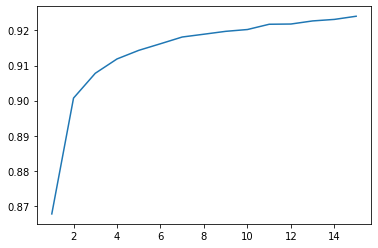

In [23]:
for epoch in range(training_epochs):
    acc = 0
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X,Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        
        #optim
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        #calculate
        avg_cost += cost/total_batch # total_batch
        pred = hypothesis.max(1)[1]
        acc += (pred.float() == Y).sum().item()
    acc /= len(data_loader)*batch_size
    
    #추가하기
    X_list.append(epoch+1)
    acc_list.append(acc)
    print('Epoch: {} Cost = {:.4f} Acc = {:.4f}%'.format(epoch+1,avg_cost, acc*100))
    
    # test
    with torch.no_grad():
        X_test = mninst_test.test_data.view(-1,28*28).float().to(device)
        Y_test = mninst_test.test_labels.to(device)

        prediction = linear(X_test)
        correct_prediction = torch.argmax(prediction,1) == Y_test
        accuarcy = correct_prediction.float().mean()
        print('Test Accuracy:',accuarcy.item())
    
    

# 시각화
plt.plot(X_list, acc_list)


In [41]:
# Visualiazation
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mninst_test)-1)

X_single_data = mninst_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_label = mninst_test.test_labels[r:r+1].to(device)



/Users/igyuseog/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [42]:
print("Label:",Y_single_label.item())
single_prediction = linear(X_single_data)

print("Prediction", torch.argmax(single_prediction, 1).item())

Label: 8
Prediction 8


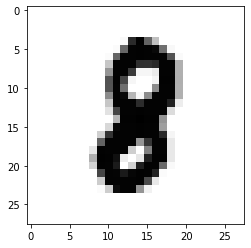

In [43]:
plt.imshow(mninst_test.test_data[r:r+1].view(28,28), cmap = "Greys", interpolation="nearest")
plt.show()